# An Investigation on Survey Data

<img src="images/surveypic.png" width="550"/>

*Source: Survey Legend*

#### I. Background 
Believe it or not, we have encountered many surveys in our day to day lives. From the nation-wide census to airport bathroom satisfaction reports, surveys are a natural gauge of feedback for any topic. 

During a year of unprecedented struggles, it is important now more than ever to elicit feedback and understand the current state of affairs. In the US, a nonpartisan think tank, the **[Pew Research Center](https://www.pewresearch.org/about/)** , has taken on this role, surveying millions of Americans in an effort to understand public attitude regarding current issues and relevant topics. In 2015, the Pew Research Center, PRC for short, conducted a survey aimed to understand the current youth generation's social media use. Below, we see its findings summarized in a *bar graph*. 

<img src="images/socialmedia.png" width="300"/>

*Source: [Pew Research Center, Dating in the Digital Age](https://www.pewresearch.org/internet/interactives/online-romance/)*

From the survey above, we see that social media has become a important aspect of flirting among teens. Though the bar chart may help reveal different insightful conclusions, it may also be a source of confusion. *How can the total percentage of teens in the graph surpass 100%*? 

Today, we'll dive into a 2020 PRC survey regarding climate change and investigate if today's division among supporters for climate change is due to age or political ideology. 

#### II. American Trends Panel (ATP)

One surveyed population used by PRC is the American Trends Panel - a nationally representative panel of adults in the US randomly selected to complete web surveys. The main survey that the ATP completes is called the Wave survey, a general survey that contains topics relevant to the current times. For example, today, we will be working with the **ATP Wave 67**, a survey administered in May 2020 about two social issues: the environment and COVID-19. 

#### III. Focus: Climate Change

As mentioned earlier, climate change today is a debate just as much as it is an actual issue. With much division over its existence, many articles have jumped to try and *explain* this division. Check it out! <a href="https://www.manomet.org/publication/the-climate-change-generation-looks-to-their-future/">**The "Climate Change Generation"**</a> portrays climate change as a generational issue: Gen Z and Millennials see the legitimacy in climate change while older generations may not. Meanwhile, <a href="https://www.brookings.edu/research/the-challenging-politics-of-climate-change/">**The Challenging Politics of Climate Change**</a> explains climate change to be split by political party identification. 

So, which *is* it? Is climate change a generational issue or a political ideology issue? Let's dive into it. 

**The Data**: ATP Wave 67 Results from ~11,000 respondents

In [18]:
# Import the necessary Libraries! This cell must be run at least once for the notebook to work
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

data = pd.read_spss("ATP_W67.sav")
data.head()

,QKEY,INTERVIEW_START_W67,INTERVIEW_END_W67,DEVICE_TYPE_W67,LANG_W67,FORM_W67,YRAHEAD_W67,SCIBEHAV1_a_W67,SCIBEHAV1_b_W67,SCIBEHAV1_c_W67,...,F_IDEO,F_ACSWEB,F_VOLSUM,F_HISP_ORIGIN,F_YEARSINUS,F_PARTYSUMIDEO,COVIDFOL_W66,WEIGHT_W67,WEIGHT_W66_W67,WEIGHT_W67_ASIAN
0,100197.0,2020-04-30 22:57:33,2020-04-30 23:33:56,Tablet,English,Form 1,Worse,"No, have never done this","No, have never done this","No, have never done this",...,Moderate,Accesses internet by paying provider,Yes,Non-Hispanic,Non-Hispanic,Moderate/Conservative Dem/Lean,Very closely,0.335843,0.322148,0.342206
1,100260.0,2020-04-30 23:40:14,2020-05-01 00:02:23,Tablet,English,Form 1,Better,"No, have never done this","No, have never done this","No, have never done this",...,Very conservative,Accesses internet by paying provider,No,Non-Hispanic,Non-Hispanic,Conservative Rep/Lean,Fairly closely,0.685331,0.631784,0.688357
2,100314.0,2020-05-03 13:46:34,2020-05-03 14:05:46,Smartphone,English,Form 1,Better,"No, have never done this","No, have never done this","No, have never done this",...,Moderate,Accesses internet by paying provider,Yes,Non-Hispanic,Non-Hispanic,Moderate/Liberal Rep/Lean,Very closely,0.411571,0.461447,0.417961
3,100363.0,2020-04-30 16:19:52,2020-04-30 16:34:17,Smartphone,English,Form 1,Better,"No, have never done this","No, have never done this","No, have never done this",...,Moderate,Accesses internet by paying provider,Yes,Non-Hispanic,Non-Hispanic,Moderate/Conservative Dem/Lean,Very closely,0.419212,0.394160,0.417276
4,100446.0,2020-04-30 17:47:12,2020-04-30 17:56:43,Laptop/PC,English,Form 1,Better,"No, have never done this","No, have never done this","No, have never done this",...,Liberal,Accesses internet by paying provider,Yes,Non-Hispanic,Non-Hispanic,Liberal Dem/Lean,Very closely,0.407522,0.386301,0.234759


From the data, we can see that each row carries information regarding one individual's survey responses. However, there are 152 columns! Let's see what the columns are and see if that helps us quantify the survey's questions.

In [3]:
#Retrieve list of columns for the survey data
list(data.columns)

['QKEY',
 'INTERVIEW_START_W67',
 'INTERVIEW_END_W67',
 'DEVICE_TYPE_W67',
 'LANG_W67',
 'FORM_W67',
 'YRAHEAD_W67',
 'SCIBEHAV1_a_W67',
 'SCIBEHAV1_b_W67',
 'SCIBEHAV1_c_W67',
 'SCIBEHAV1_d_W67',
 'SCIBEHAV1_e_W67',
 'SCIBEHAV1_f_W67',
 'SCIBEHAV1_g_W67',
 'POLICY1_W67',
 'POLICY2_W67',
 'POLICY3_W67',
 'ENV2_a_W67',
 'ENV2_b_W67',
 'ENV2_c_W67',
 'ENV2_d_W67',
 'ENV2_e_W67',
 'ENV2_f_W67',
 'EN1_W67',
 'ENVIR6_W67',
 'ENVIR8_a_W67',
 'ENVIR8_b_W67',
 'ENVIR8_c_W67',
 'ENVIR8_d_W67',
 'ENVIR8_e_W67',
 'EN7_W67',
 'CCPOLICY_a_W67',
 'CCPOLICY_b_W67',
 'CCPOLICY_c_W67',
 'CCPOLICY_d_W67',
 'CCPOLICY_e_W67',
 'CLIM9_W67',
 'CLIM10_a_W67',
 'CLIM10_b_W67',
 'CLIM10_c_W67',
 'CLIM10_d_W67',
 'CLIM10_e_W67',
 'CLIM10_f_W67',
 'CLIM10_g_W67',
 'RQ1_F1A_W67',
 'PQ1_F2A_W67',
 'CLIN_TRIAL1_W67',
 'CLIN_TRIAL2_W67',
 'USHELPOTHER_W67',
 'USHELPSOLVE_W67',
 'UNDCIMPCTa_W67',
 'IMMIMPCTa_W67',
 'COVIDEGFP_a_W67',
 'COVIDEGFP_b_W67',
 'COVIDEGFP_c_W67',
 'COVIDEGFP_d_W67',
 'COVIDEGFP_f_W67',
 'CO

This list is quite long, 152 entries to be exact. Notice how the majority of the columns' names begin with ENV, CLIM, or COVID. This confirms the background of this survey that many questions involve either climate change or COVID-19. Let's reference the data dictionary and look at a specific evironmental question. Take **CLIM9_W67**, which corresponds to question #9 on the survey:

---------

#### Question 9: 
##### How much, if at all, do you think global climate change is currently affecting your local community?

##### 1. A Great Deal
##### 2. Some
##### 3. Not Too Much
##### 4. Not At All

---------

Now that we've found a question to investigate, let's go back to the lsit of column names. *Why do so many columns start with F_?* Let's use indexing to find out.

In [5]:
# Subset to Columns Beginning with F_...
data[['F_METRO',
 'F_CREGION',
 'F_CDIVISION',
 'F_AGECAT',
 'F_SEX',
 'F_EDUCCAT',
 'F_EDUCCAT2',
 'F_HISP',
 'F_RACECMB',
 'F_RACETHN',
 'F_CITIZEN',
 'F_NATIVITY2',
 'F_MARITAL',
 'F_RELIG',
 'F_BORN',
 'F_ATTEND',
 'F_PARTY_FINAL',
 'F_PARTYLN_FINAL',
 'F_PARTYSUM_FINAL',
 'F_INCOME',
 'F_INCOME_RECODE',
 'F_REG',
 'F_IDEO',
 'F_ACSWEB',
 'F_VOLSUM',
 'F_HISP_ORIGIN',
 'F_YEARSINUS',
 'F_PARTYSUMIDEO']]

,F_METRO,F_CREGION,F_CDIVISION,F_AGECAT,F_SEX,F_EDUCCAT,F_EDUCCAT2,F_HISP,F_RACECMB,F_RACETHN,...,F_PARTYSUM_FINAL,F_INCOME,F_INCOME_RECODE,F_REG,F_IDEO,F_ACSWEB,F_VOLSUM,F_HISP_ORIGIN,F_YEARSINUS,F_PARTYSUMIDEO
0,Metropolitan,Midwest,West North Central,65+,Female,Some College,"Some college, no degree",No,White,White non-Hispanic,...,Dem/Lean Dem,"$20,000 to less than $30,000","<$30,000",You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Accesses internet by paying provider,Yes,Non-Hispanic,Non-Hispanic,Moderate/Conservative Dem/Lean
1,Metropolitan,West,Pacific,65+,Male,College graduate+,College graduate/some post grad,No,White,White non-Hispanic,...,Rep/Lean Rep,"$50,000 to less than $75,000","$30-$74,999",You are ABSOLUTELY CERTAIN that you are regist...,Very conservative,Accesses internet by paying provider,No,Non-Hispanic,Non-Hispanic,Conservative Rep/Lean
2,Non-metropolitan,Midwest,East North Central,65+,Male,Some College,"Some college, no degree",No,White,White non-Hispanic,...,Rep/Lean Rep,"$30,000 to less than $40,000","$30-$74,999",You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Accesses internet by paying provider,Yes,Non-Hispanic,Non-Hispanic,Moderate/Liberal Rep/Lean
3,Metropolitan,Northeast,Middle Atlantic,30-49,Female,College graduate+,Postgraduate,No,White,White non-Hispanic,...,Dem/Lean Dem,"$150,000 or more","$75,000+",You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Accesses internet by paying provider,Yes,Non-Hispanic,Non-Hispanic,Moderate/Conservative Dem/Lean
4,Metropolitan,Northeast,New England,50-64,Female,College graduate+,Postgraduate,No,Asian or Asian-American,Other,...,Dem/Lean Dem,"$100,000 to less than $150,000","$75,000+",You are ABSOLUTELY CERTAIN that you are regist...,Liberal,Accesses internet by paying provider,Yes,Non-Hispanic,Non-Hispanic,Liberal Dem/Lean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10952,Non-metropolitan,South,West South Central,50-64,Female,H.S. graduate or less,Less than high school,No,Black or African American,Black non-Hispanic,...,Dem/Lean Dem,"Less than $10,000","<$30,000",You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Does not access the Internet by paying a cell ...,No,Non-Hispanic,Non-Hispanic,Moderate/Conservative Dem/Lean
10953,Metropolitan,South,South Atlantic,50-64,Female,H.S. graduate or less,High school graduate,No,Black or African American,Black non-Hispanic,...,Dem/Lean Dem,"Less than $10,000","<$30,000",You are ABSOLUTELY CERTAIN that you are regist...,Very liberal,Does not access the Internet by paying a cell ...,No,Non-Hispanic,Non-Hispanic,Liberal Dem/Lean
10954,Metropolitan,Northeast,Middle Atlantic,30-49,Male,H.S. graduate or less,Less than high school,No,White,White non-Hispanic,...,Rep/Lean Rep,"$10,000 to less than $20,000","<$30,000",You are ABSOLUTELY CERTAIN that you are regist...,Conservative,Does not access the Internet by paying a cell ...,Yes,Non-Hispanic,Non-Hispanic,Conservative Rep/Lean
10955,Non-metropolitan,South,South Atlantic,50-64,Male,H.S. graduate or less,High school graduate,No,White,White non-Hispanic,...,Rep/Lean Rep,"Less than $10,000","<$30,000",You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Does not access the Internet by paying a cell ...,No,Non-Hispanic,Non-Hispanic,Moderate/Liberal Rep/Lean


It appears that all columns that begin with *F_* are columns for demographics. For example, the second column above, *F_CREGION*, contains the US region of each respondent. Similarly, *F_AGECAT* has the age of each survey taker and *F_IDEO* has their political ideologies.

In [13]:
# Create new dataframe with respondent age and political ideology 
age_and_climate = data[["F_AGECAT", "CLIM9_W67"]]

In [19]:
# Change the responses to match their numerical value
responses = list(age_and_climate["CLIM9_W67"])

for i in range(len(responses)):
    if responses[i] == "A great deal":
        responses[i] = 1.0
    if responses[i] == "Some":
        responses[i] = 2.0
    if responses[i] == "Not too much":
        responses[i] = 3.0
    if responses[i] == "Not at all":
        responses[i] = 4.0
    if responses[i] == "Refused":
        responses[i] = np.nan
        
age_and_climate["Response_Sentiment"] = responses

In [20]:
# Recall dataframe of demographics and their response to environmental question 
age_and_climate 

,F_AGECAT,CLIM9_W67,Response_Sentiment
0,65+,Some,2.0
1,65+,Not at all,4.0
2,65+,Not too much,3.0
3,30-49,Some,2.0
4,50-64,Some,2.0
...,...,...,...
10952,50-64,Some,2.0
10953,50-64,A great deal,1.0
10954,30-49,Not at all,4.0
10955,50-64,Not too much,3.0


#### IV. Visualizing the Data

Let's first investigate the relationship between respondent's sentiment about climate change and their age. Recall that high response sentiments correspond to the belief that climate change does not affect the respondent while low response sentiments indicate that climate change is a pressing issue. 

In [22]:
age_sentiment = age_and_climate[["F_AGECAT", "Response_Sentiment"]]
age_sentiment

,F_AGECAT,Response_Sentiment
0,65+,2.0
1,65+,4.0
2,65+,3.0
3,30-49,2.0
4,50-64,2.0
...,...,...
10952,50-64,2.0
10953,50-64,1.0
10954,30-49,4.0
10955,50-64,3.0


In [30]:
grouped_age_sentiment = age_and_climate.groupby(["F_AGECAT"]).mean().reset_index()
grouped_age_sentiment

,F_AGECAT,Response_Sentiment
0,18-29,2.048107
1,30-49,2.104167
2,50-64,2.198961
3,65+,2.275875
4,Refused,1.865672


In [ ]:
f = sns.catplot(x="F_AGECAT", y="Response_Sentiment",kind="bar", data=grouped_age_sentiment)
f.set_xticklabels(rotation=30);

From this bar chart, we see the following:

1. The *refused* bar indicates all respondents who refused to provide their age
2. All other age groups share a sentiment of at least 2.0, which corresponds to "Some" in the context of the question of if climate change affects the respondent. 
3. Respondents ages 65+ are a bit higher in terms of sentiment, however only by approximately .23 of a point

In order to make a comparison, let's analyze the same relationship but with political ideology. 

In [26]:
ideology_sentiment = age_and_climate
ideology_sentiment["ideology"] = data[["F_IDEO"]]
ideology_sentiment

,F_AGECAT,CLIM9_W67,Response_Sentiment,ideology
0,65+,Some,2.0,Moderate
1,65+,Not at all,4.0,Very conservative
2,65+,Not too much,3.0,Moderate
3,30-49,Some,2.0,Moderate
4,50-64,Some,2.0,Liberal
...,...,...,...,...
10952,50-64,Some,2.0,Moderate
10953,50-64,A great deal,1.0,Very liberal
10954,30-49,Not at all,4.0,Conservative
10955,50-64,Not too much,3.0,Moderate


In [27]:
grouped_ideology_sentiment = ideology_sentiment.groupby(["ideology"]).mean().reset_index()
grouped_ideology_sentiment

,ideology,Response_Sentiment
0,Conservative,2.778499
1,Liberal,1.727756
2,Moderate,2.010204
3,Refused,1.955665
4,Very conservative,3.115431
5,Very liberal,1.608818


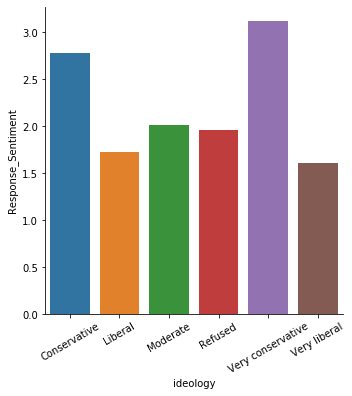

In [29]:
f = sns.catplot(x="ideology", y="Response_Sentiment",kind="bar", data=grouped_ideology_sentiment)
f.set_xticklabels(rotation=30);

From this bar chart, we see a much clearer difference in sentiments. Left-leaning respondents have sentiments below 1.75 while right-leaning respondents have sentiments above 2.5. Overall, this is a difference of almost 1 point, indicating a much larger difference than the relationship between age and climate change sentiment.

#### V. Conclusions

From the above bar charts, we can conclude that respondent's political ideology correspondeds with a greater difference in climate change sentiment. However, it is dangerous here to conclude causation. We can not say that political party affiliation *causes* a respondent to swing a certain way for climate change. Other ommitted variables, such as the respondent's education level or consumption of news, may have impacts on their interpretation of climate change effects but were not included in the analysis above. 

From this notebook, we hope you:

1. Learned how surveys are used in society (specifically the Pew Research Center)
2. Created data visualizations to make conclusions about the data
3. Acknowledged the limitations of data analysis and how correlation does not imply causation.

#### VI. Feedback

We would love to hear about your experience about this notebook! What did you find (un)helpful? What would you change about this notebook? 

#### VII. Credits
This notebook was written *Alexander Cui* 